<a href="https://colab.research.google.com/github/tigju/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
# First Exercise

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# line only for Jupiter use
%matplotlib inline

In [0]:
# I've desided to use this style
plt.style.use('seaborn-pastel')

In [374]:
# available styles
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [0]:
# Titaic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

titanic_df = pd.read_csv(url)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# Pclass is categorical
# add new column
titanic_df['cabin_class'] = titanic_df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


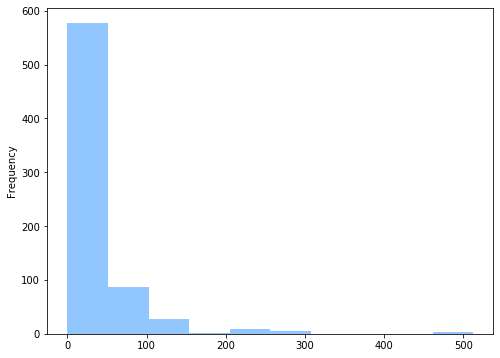

In [0]:
# fare is continious
titanic_df['Fare'].plot(kind='hist', figsize=(8, 6));

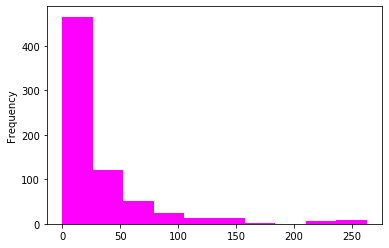

In [0]:
# remove outliers
titanic_df = titanic_df[titanic_df['Fare'] < 500]
titanic_df['Fare'].plot(kind='hist', color='magenta');


In [0]:
# convert continious variables to categorical
mybins = [0,8,15,33,512]
mylabels = ['low', 'medium', 'high', 'vhigh']
titanic_df['fare_groups'] = pd.cut(titanic_df['Fare'], bins=mybins, labels=mylabels)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
results = titanic_df['fare_groups'].value_counts().sort_index()


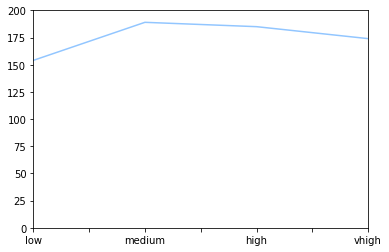

In [0]:
results.plot(ylim=(0,200));

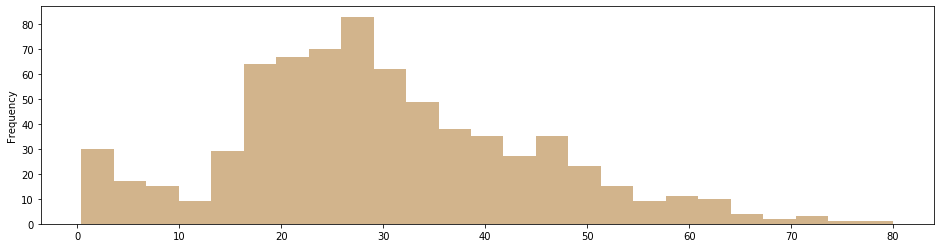

In [0]:
# Histogram
titanic_df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

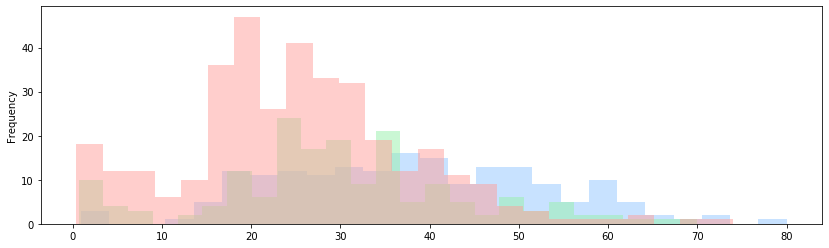

In [0]:
# Stacked Histogram of continuous variable, broken out by categorical variable
titanic_df[titanic_df['Pclass'] == 1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5)
titanic_df[titanic_df['Pclass'] == 2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5)
titanic_df[titanic_df['Pclass'] == 3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);

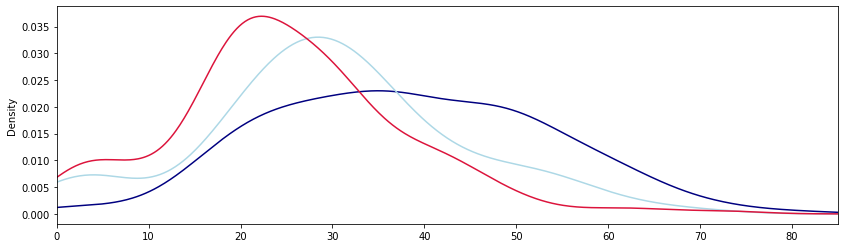

In [0]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
titanic_df[titanic_df['Pclass'] == 1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy')
titanic_df[titanic_df['Pclass'] == 2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue')
titanic_df[titanic_df['Pclass'] == 3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

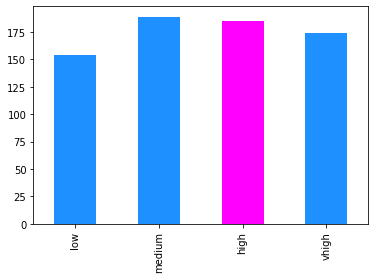

In [0]:
# Bar chart
titanic_df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['dodgerblue', 'dodgerblue', 'magenta', 'dodgerblue']);

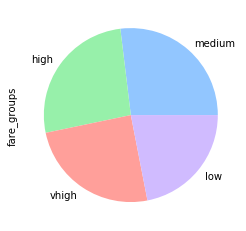

In [0]:
# Pie chart
titanic_df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [0]:
# Compare two categorical variables using crosstab
 cab_survive = pd.crosstab(titanic_df['cabin_class'], titanic_df['Survived'])

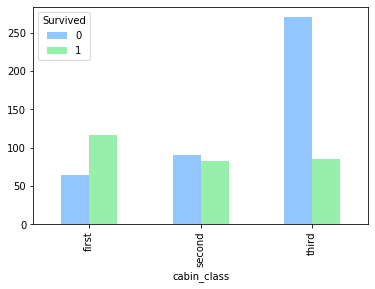

In [0]:
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents.
cab_survive1 = pd.crosstab(titanic_df['cabin_class'], titanic_df['Survived'], normalize='columns')

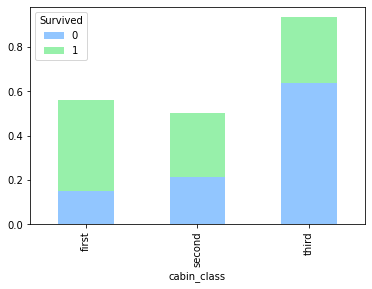

In [0]:
# stacked bar chart, for easy comparison of two categorical variables.
cab_survive1.plot(kind='bar', stacked=True);

In [0]:
# Crosstab with column percents.
cab_survive2 = pd.crosstab(titanic_df['cabin_class'], titanic_df['Survived'], normalize='index')

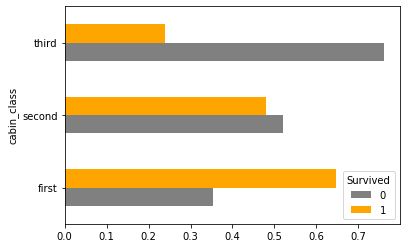

In [0]:
cab_survive2.plot(kind='barh', color=['gray', 'orange']);

In [0]:
# Let's look at a single continuous variable
titanic_df["Age"].mean()

29.618011283497882

In [0]:
# continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = titanic_df.groupby('cabin_class')['Age'].mean()

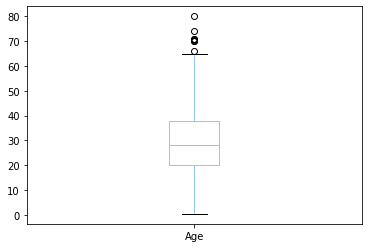

In [0]:
# visualize a single continuous variable with box
titanic_df['Age'].plot(kind='box');

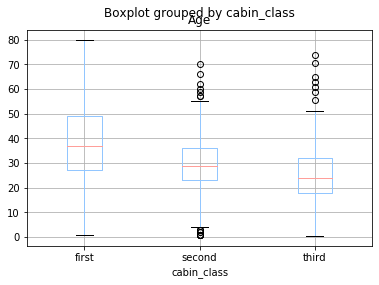

In [0]:
# to break out a continuous variable by a categorical variable
titanic_df.boxplot(column='Age', by='cabin_class');

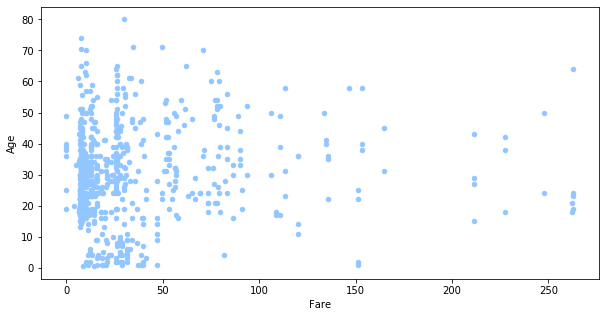

In [0]:
# Two continuous variables: age by fare
titanic_df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,5));

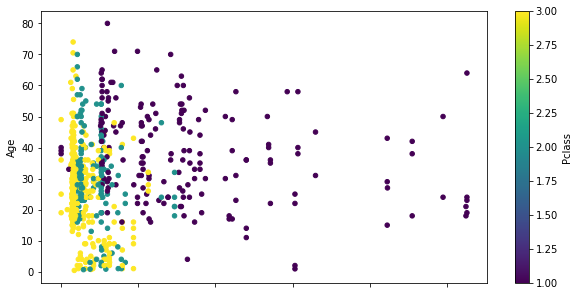

In [0]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
titanic_df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='viridis', figsize=(10,5));

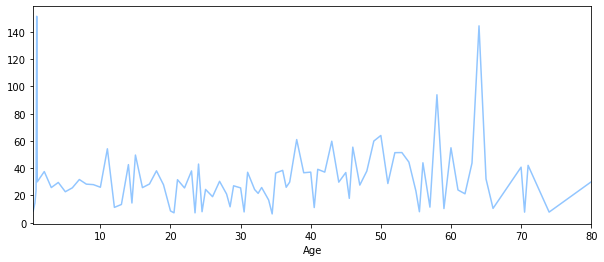

In [0]:
# line chart: age by fare
titanic_df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

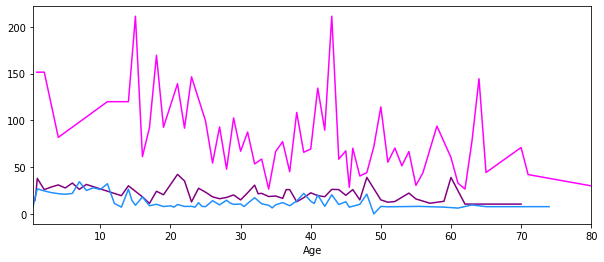

In [0]:
# Line chart: age by fare and cabin class
mycolors=['magenta', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
  titanic_df[titanic_df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors[x-1])

In [0]:
# Correlation Matrix
corr_matrix=titanic_df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


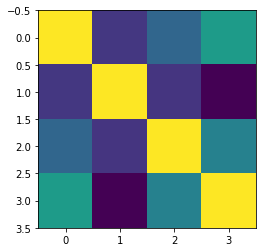

In [0]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

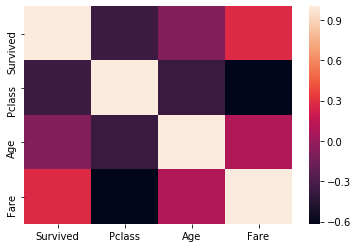

In [0]:
# Seaborn.
import seaborn as sns
sns.heatmap(corr_matrix);

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x**2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

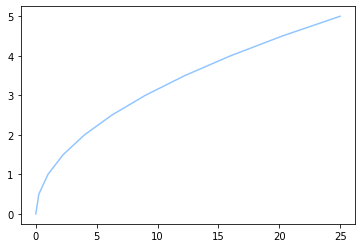

In [0]:
plt.plot(y,x);

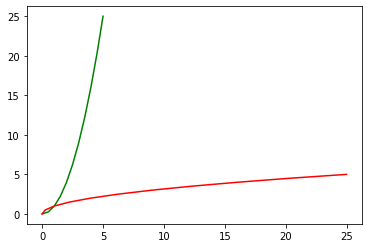

In [0]:
plt.plot(x,y, 'g')
plt.plot(y,x, 'r');

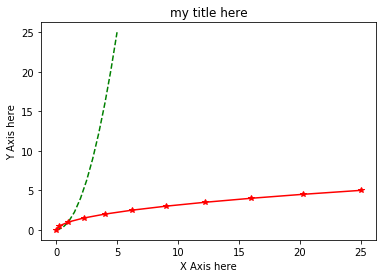

In [0]:
plt.plot(x,y, 'g--')
plt.plot(y,x, 'r*-');
plt.xlabel('X Axis here')
plt.ylabel('Y Axis here')
plt.title('my title here');

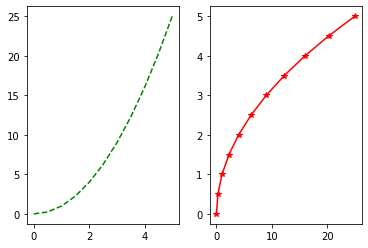

In [0]:
plt.subplot(1,2,1)
plt.plot(x,y, 'g--')

plt.subplot(1,2,2)
plt.plot(y,x, 'r*-');

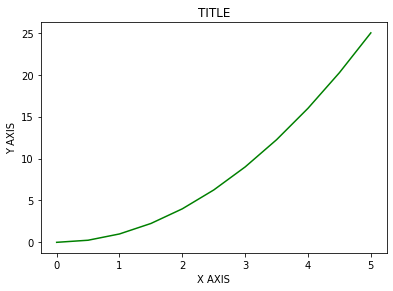

In [0]:
# .figure() method
fig = plt.figure()

axes = fig.add_axes([0.1,0.1, 0.8,0.8])

axes.plot(x,y, 'g')

axes.set_xlabel('X AXIS')
axes.set_ylabel('Y AXIS')
axes.set_title('TITLE');

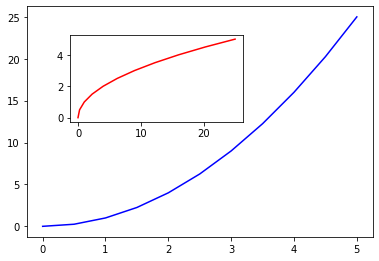

In [0]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,  0.8,0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x,y,'b')
axes2.plot(y,x,'r');

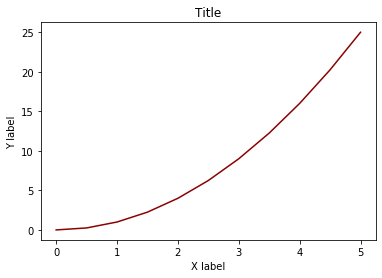

In [0]:
# subplots method
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x,y,'darkred')
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('Title');

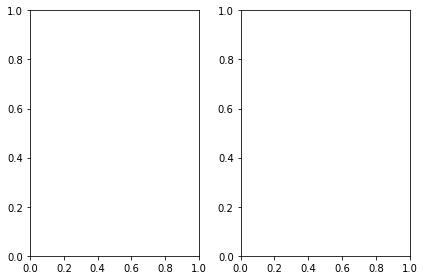

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()

In [0]:
axes


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68c415cda0>,
      dtype=object)

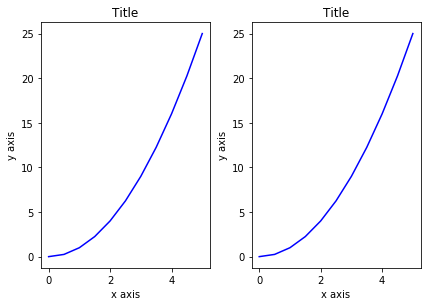

In [0]:
# iterate through axes

for ax in axes:
  ax.plot(x,y, 'b')
  ax.set_xlabel('x axis')
  ax.set_ylabel('y axis')
  ax.set_title('Title')

fig

In [0]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

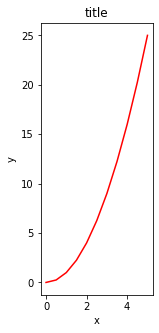

In [0]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
fig.savefig("myfig.png")

In [0]:
fig.savefig("myfig.jpg", dpi=200)

In [0]:
ax.set_title("title");

In [0]:

ax.set_xlabel("x")
ax.set_ylabel("y");

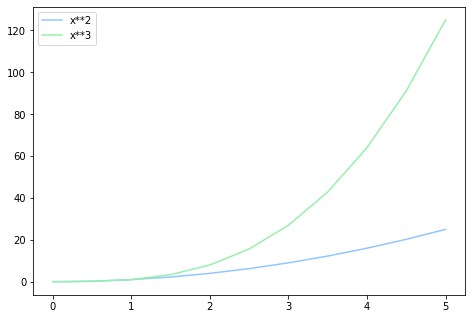

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

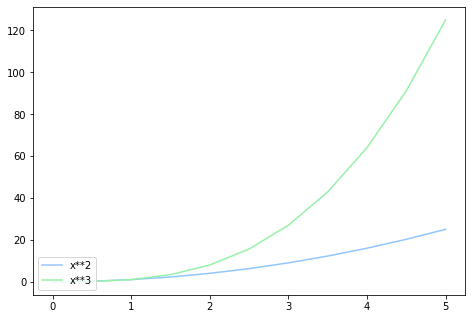

In [0]:
ax.legend(loc=3)

fig

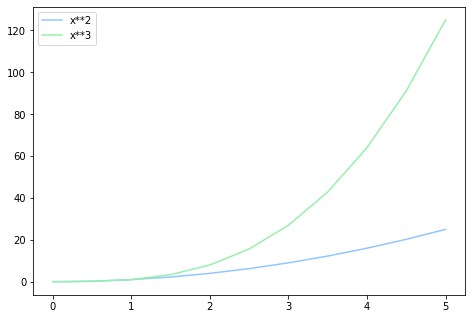

In [0]:
ax.legend() # let matplotlib decide the optimal location
fig

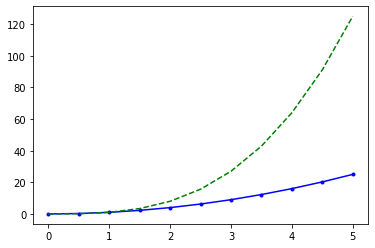

In [0]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--')

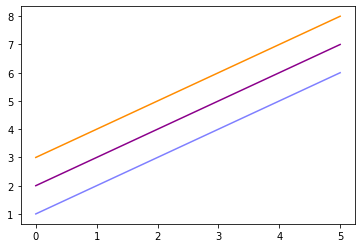

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) 
ax.plot(x, x+2, color="#8B008B")       
ax.plot(x, x+3, color="#FF8C00") 

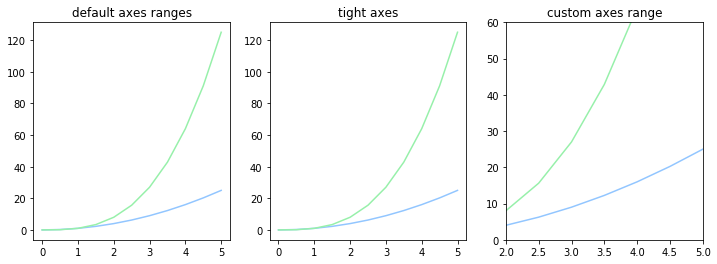

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
plt.style.use('fivethirtyeight')

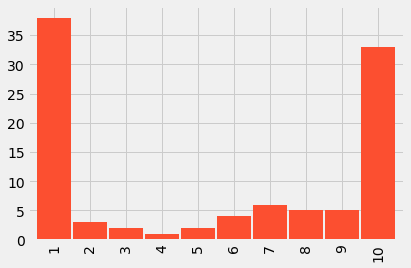

In [0]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.94);

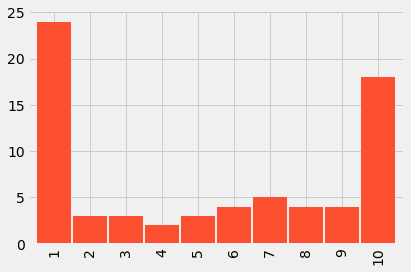

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.94);

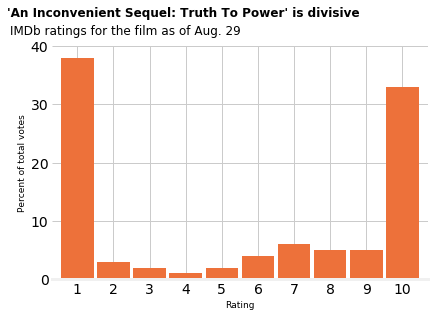

In [0]:

fig, ax = plt.subplots()
fig.patch.set(facecolor="none")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="none")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:

# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.set_index('timestamp', inplace=True)

In [0]:
lastday = df['2017-08-29']

In [0]:
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


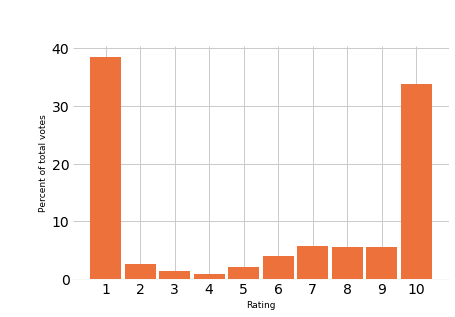

In [0]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="none")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="none")

# border frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold',
             color='white')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42, color='white')

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));
ax.tick_params(axis='both', color='white')

In [377]:
example = Image(url='https://fivethirtyeight.com/wp-content/uploads/2014/11/chalabi-flowers-feature-commonname-1.png', width=400)

display(example)

In [378]:
uploaded = files.upload()

Saving new-top-firstNames.csv to new-top-firstNames (1).csv


In [379]:
# upload csv and get rid of "Unnamed: 0" 

firstnames_df = pd.read_csv('new-top-firstNames.csv', index_col=0)
firstnames_df.head()

,name,newPerct2013
1,Michael,0.011577
2,James,0.010218
3,John,0.009675
4,Robert,0.009493
5,David,0.008943


In [0]:
firstnames_df = firstnames_df.rename(columns={'newPerct2013': 'popularity'})

In [0]:
firstnames_df['popularity'] = [cell*1000 for cell in firstnames_df['popularity']]

In [413]:

firstnames_df['popularity'] = [float(cell) for cell in firstnames_df['popularity']]
firstnames_df.dtypes

name           object
popularity    float64
sex            object
dtype: object

In [0]:
women_names = ['Mary','Jennifer', 'Patricia', 'Linda', 'Elizabeth']


In [0]:
def add_sex(name):
  if name in women_names:
    return 'F'
  else:
    return 'M'


In [418]:
firstnames_df['sex'] = firstnames_df['name'].apply(add_sex)
firstnames_df.head(20)

,name,popularity,sex
1,Michael,11.6,M
2,James,10.2,M
3,John,9.7,M
4,Robert,9.5,M
5,David,8.9,M
6,William,7.5,M
7,Mary,6.8,F
8,Christopher,5.9,M
9,Joseph,5.4,M
10,Richard,5.3,M


In [0]:

x = firstnames_df.groupby(['name'])['popularity'].mean().sort_values().tail(20)

In [433]:
mask1 = firstnames_df[firstnames_df['sex'] == 'F']
mask2 = firstnames_df[firstnames_df['sex'] == 'M']


,name,popularity,sex
7,Mary,6.8,F
14,Jennifer,4.3,F
17,Patricia,3.8,F
18,Linda,3.8,F
20,Elizabeth,3.5,F


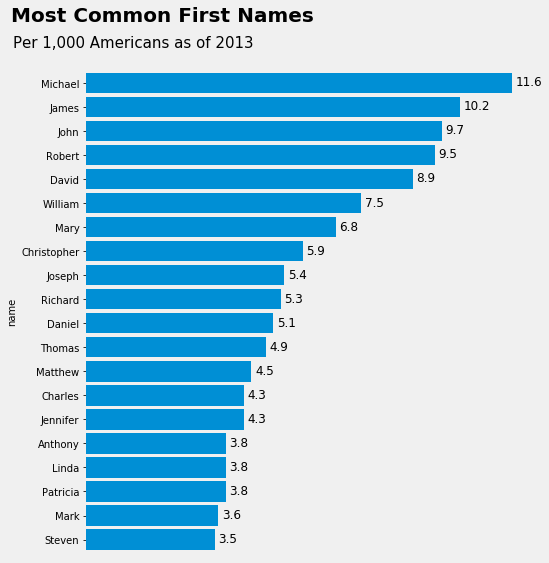

In [435]:
plt.style.use('fast')
fig, ax = plt.subplots(1,1)

# Figure background color
fig.patch.set(facecolor="#F0F0F0")
# plot bg color
ax.set(facecolor="#F0F0F0")

# border frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    top=False,         # ticks along the top edge are off
    labelsize=20,
    labelbottom=False) # labels along the bottom edge are off


ax.get_yaxis().set_visible(False)

labels = ['F', 'M']


# Set the bars

ax = x.plot(kind='barh', figsize=(8,9), color='#008FD5', zorder=2, width=0.85)

ax.set_title("Most Common First Names", 
             fontsize=20,
             x=0.17,
             y= 1.08, 
             fontweight='bold')
ax.text(s="Per 1,000 Americans as of 2013", fontsize=15, x=-2, y=20.5);

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=12)
    


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here